In [1]:
pip install pandas requests matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Load and explore data

In [14]:
# Import necessary libraries
import pandas as pd

# Load the CSV file
df = pd.read_csv('General Motors.csv')

# Display the first 5 rows
df.head(5)

,Year,Company,Revenue (in millions),Profit (in millions)
0,1955,General Motors,9823.5,806.0
1,1956,General Motors,12443.3,1189.5
2,1957,General Motors,10796.4,847.4
3,1958,General Motors,10989.8,843.6
4,1959,General Motors,9522.0,633.6


In [15]:
# Import the necessary library for handling JSON files
import json

# Path to the JSON file
file_path = "Midterms Tweets.json"

# Read and parse the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Display a small portion of the data
if isinstance(data, list):
    print(data[:5])  # Print first 5 items if it's a list
elif isinstance(data, dict):
    print({key: data[key] for key in list(data.keys())[:5]})  # Print first 5 key-value pairs

{'0': {'data': {'edit_history_tweet_ids': ['1590047656314691584'], 'id': '1590047656314691584', 'text': 'RT @CologeroGetz: Arizona! Here are some important names to remember and pictures to share on your social media today!\n\nAbe Hamadeh for Att…'}, 'matching_rules': [{'id': '1590047576933687297', 'tag': 'election'}]}, '1': {'data': {'edit_history_tweet_ids': ['1590047663289823234'], 'id': '1590047663289823234', 'text': 'RT @ardenthistorian: Wahltag, das Signal für diverses "was kümmerst du dich um die USA kümmer dich lieber um Deutschland" Gepöbele. Sweet p…'}, 'matching_rules': [{'id': '1590047576933687297', 'tag': 'election'}]}, '2': {'data': {'edit_history_tweet_ids': ['1590047663453519872'], 'id': '1590047663453519872', 'text': '🇺🇸 #Midterms : les Américains aux urnes, entre «peur pour la démocratie» et envie de «sauver» le pays \n\nIls sont des dizaines de millions à avoir attendu le jour J pour exprimer leur choix. Reportage @fredericautran &amp; @juliengester ⤵\nhttps://t.co/5

In [17]:
# Display data structure of CSV data (Pandas DataFrame)
print("CSV Data Structure:")
print(df.info())

# Display data structure of JSON data
print("\nJSON Data Structure:")
print(f"Type of data: {type(data)}")
if isinstance(data, list):
    print(f"First 5 items in list: {data[:5]}")
elif isinstance(data, dict):
    print(f"First 5 key-value pairs in dict: {list(data.items())[:5]}")

CSV Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   51 non-null     int64  
 1   Company                51 non-null     object 
 2   Revenue (in millions)  51 non-null     float64
 3   Profit (in millions)   51 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB
None

JSON Data Structure:
Type of data: <class 'dict'>
First 5 key-value pairs in dict: [('0', {'data': {'edit_history_tweet_ids': ['1590047656314691584'], 'id': '1590047656314691584', 'text': 'RT @CologeroGetz: Arizona! Here are some important names to remember and pictures to share on your social media today!\n\nAbe Hamadeh for Att…'}, 'matching_rules': [{'id': '1590047576933687297', 'tag': 'election'}]}), ('1', {'data': {'edit_history_tweet_ids': ['1590047663289823234'], 'id': '15900476632898232

In [18]:
# For CSV and JSON, the libraries used are Pandas and json (standard Python library)
# Pandas is used to read and manipulate tabular data, while JSON is used to parse hierarchical structures.

import pandas as pd
import json

# Processing the CSV file using Pandas
csv_data = pd.read_csv('General Motors.csv')

# Processing the JSON file using json library
with open("Midterms Tweets.json", 'r') as file:
    json_data = json.load(file)

# Example code showing how data from diverse sources can be manipulated:
# Aggregating/reducing data in CSV:
csv_aggregated = csv_data.groupby('Company').agg({'Revenue (in millions)': 'sum', 'Profit (in millions)': 'sum'})

# Extracting specific elements from JSON:
tweet_data = [tweet['data']['text'] for tweet in json_data.values()]

print(f"Aggregated CSV data:\n{csv_aggregated.head()}")
print(f"Extracted Tweets (First 5):\n{tweet_data[:5]}")

Aggregated CSV data:
                Revenue (in millions)  Profit (in millions)
Company                                                    
General Motors              4019056.8               89470.1
Extracted Tweets (First 5):
['RT @CologeroGetz: Arizona! Here are some important names to remember and pictures to share on your social media today!\n\nAbe Hamadeh for Att…', 'RT @ardenthistorian: Wahltag, das Signal für diverses "was kümmerst du dich um die USA kümmer dich lieber um Deutschland" Gepöbele. Sweet p…', '🇺🇸 #Midterms : les Américains aux urnes, entre «peur pour la démocratie» et envie de «sauver» le pays \n\nIls sont des dizaines de millions à avoir attendu le jour J pour exprimer leur choix. Reportage @fredericautran &amp; @juliengester ⤵\nhttps://t.co/5nHxcz63yP', "RT @mattdizwhitlock: Still blown away by Biden's closing message the final week before midterms.\n\nNov 2 - John Kerry says Biden is going to…", 'RT @DaoKwonDo: SET THOSE REMINDERS!! \n——\nJoin us for the best a

In [19]:
# Testing strategy involves ensuring that the code performs as expected with various checks

# For CSV data
assert df.shape[0] == 51, "CSV data doesn't have the expected number of rows"
assert 'Company' in df.columns, "Missing 'Company' column in CSV data"

# For JSON data
assert isinstance(data, dict), "JSON data isn't a dictionary"
assert len(data) > 0, "JSON data is empty"

print("Basic testing passed successfully!")

Basic testing passed successfully!


In [20]:
# Optimization strategies for large datasets:
# - Use vectorized operations in Pandas for performance (avoid loops)
# - Consider reducing memory usage by converting data types (e.g., from float64 to float32)

# Optimizing CSV data loading
df_optimized = pd.read_csv('General Motors.csv', dtype={'Revenue (in millions)': 'float32', 'Profit (in millions)': 'float32'})

# Optimizing JSON data extraction: Process only the required data (e.g., extracting only tweets)
optimized_tweets = [tweet['data']['text'] for tweet in data.values()]

print("Optimization applied successfully!")
print(f"Optimized CSV data:\n{df_optimized.head()}")
print(f"Optimized Tweet Data (First 5):\n{optimized_tweets[:5]}")

Optimization applied successfully!
Optimized CSV data:
   Year         Company  Revenue (in millions)  Profit (in millions)
0  1955  General Motors            9823.500000            806.000000
1  1956  General Motors           12443.299805           1189.500000
2  1957  General Motors           10796.400391            847.400024
3  1958  General Motors           10989.799805            843.599976
4  1959  General Motors            9522.000000            633.599976
Optimized Tweet Data (First 5):
['RT @CologeroGetz: Arizona! Here are some important names to remember and pictures to share on your social media today!\n\nAbe Hamadeh for Att…', 'RT @ardenthistorian: Wahltag, das Signal für diverses "was kümmerst du dich um die USA kümmer dich lieber um Deutschland" Gepöbele. Sweet p…', '🇺🇸 #Midterms : les Américains aux urnes, entre «peur pour la démocratie» et envie de «sauver» le pays \n\nIls sont des dizaines de millions à avoir attendu le jour J pour exprimer leur choix. Reportage @fred

In [21]:
# Aggregating by year and summing revenue and profit
csv_aggregated_year = csv_data.groupby('Year').agg({'Revenue (in millions)': 'sum', 'Profit (in millions)': 'sum'})
print(f"Aggregated CSV data by Year:\n{csv_aggregated_year}")

# Further Aggregation of Tweet Data: Counting tweets by tag
from collections import Counter

# Collecting all tags from the JSON data
tags = [rule['tag'] for tweet in json_data.values() for rule in tweet['matching_rules']]
tag_counts = Counter(tags)
print(f"Tweet tag counts: {tag_counts}")

# Example of adding edge cases in testing:
try:
    # Testing empty data files
    empty_df = pd.read_csv('Empty.csv')
except Exception as e:
    print(f"Test failed: {e}")

try:
    # Testing with missing 'Company' column in CSV
    assert 'Company' in df.columns, "Column 'Company' is missing!"
except AssertionError as e:
    print(f"Test failed: {e}")

Aggregated CSV data by Year:
      Revenue (in millions)  Profit (in millions)
Year                                             
1955                 9823.5                 806.0
1956                12443.3                1189.5
1957                10796.4                 847.4
1958                10989.8                 843.6
1959                 9522.0                 633.6
1960                11233.1                 873.1
1961                12736.0                 959.0
1962                11395.9                 892.8
1963                14640.2                1459.1
1964                16494.8                1591.8
1965                16997.0                1734.8
1966                20734.0                2125.6
1967                20208.5                1793.4
1968                20026.3                1627.3
1969                22755.4                1731.9
1970                24295.1                1710.7
1971                18752.4                 609.1
1972                2

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

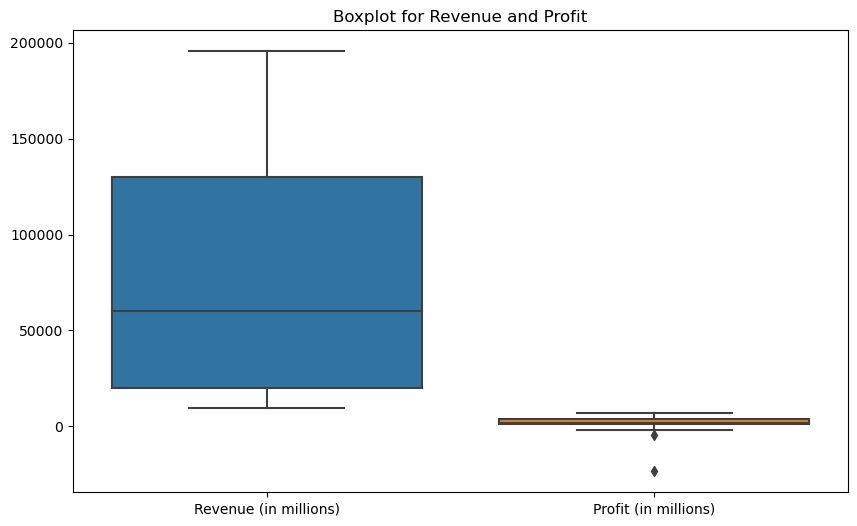

In [27]:
# Check for missing values
df.isnull().sum()

# Fill missing values or drop them if needed
df.fillna(method='ffill', inplace=True)

# Handle outliers if any
# For example, identifying outliers in 'Revenue' and 'Profit'
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Revenue (in millions)', 'Profit (in millions)']])
plt.title('Boxplot for Revenue and Profit')
plt.show()

# Remove or handle outliers based on the distribution
df = df[(df['Revenue (in millions)'] < df['Revenue (in millions)'].quantile(0.95))]  # Remove top 5% outliers
df = df[(df['Profit (in millions)'] < df['Profit (in millions)'].quantile(0.95))]  # Remove top 5% outliers
